In [18]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('final_dataset.csv')
data.head()

,Unnamed: 0,date,price,sentiment
0,0,2021-11-10T00:00:00+00:00,66996.828029,0.0
1,1,2021-11-10T01:00:00+00:00,67020.628419,0.0
2,2,2021-11-10T02:00:00+00:00,66817.702353,0.0
3,3,2021-11-10T03:00:00+00:00,66484.709002,0.0
4,4,2021-11-10T04:00:00+00:00,66637.905036,0.0


In [3]:
data = data[~(data['date'] == 0)]

In [4]:
data = data[4587:].reset_index(drop=True)

In [5]:
if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.columns

Index(['date', 'price', 'sentiment'], dtype='object')

In [6]:
mm_obj = MinMaxScaler()
arr = mm_obj.fit_transform(data['price'].values.reshape(-1, 1))
arr.shape

(7678, 1)

In [7]:
sentiments = data['sentiment']
# sentiments.values
a = arr.copy()
l = []
for i in range(len(a)):
    l.append([a[i][0], sentiments.values[i]])

In [32]:
new_arr = np.array(l)
# new_arr[0:2, 0]

In [37]:
new_arr = new_arr[1730:]

In [38]:
# will be considering for 10 days when predicting, so 10x24hrs
def format_arr(arr):
    X = []
    y = []

    for i in range(len(arr) - 240):
        X.append(arr[i:i+240])
        y.append(arr[i+240, 0])
    X = np.array(X)
    y = np.array(y)

    return X, y

format_arr(new_arr)[0].shape, format_arr(new_arr)[1].shape

((5708, 240, 2), (5708,))

In [53]:
int(len(new_arr) * 0.9), len(new_arr) - int(len(new_arr) * 0.9)

(5353, 595)

In [69]:
X_train, y_train = format_arr(new_arr[ : int(len(new_arr) * 0.9)])
X_test, y_test = format_arr(new_arr[int(len(new_arr) * 0.9) : -240])

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train, y_train = format_arr(new_arr)

In [70]:
X_train.shape, y_train.shape

((5708, 240, 2), (5708,))

In [41]:
myModel = Sequential([
    Bidirectional(LSTM(239, return_sequences = True, input_shape = (240, 2))),
    Dropout(0.2),
    Bidirectional(LSTM(239, return_sequences = True)),
    Dropout(0.2),
    Bidirectional(LSTM(239)),
    Dropout(0.2),
    Dense(1, activation='linear')
])
myModel.compile(loss = 'mean_squared_error', optimizer = 'adam')
# myModel.summary()

In [42]:
myModel.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1)
# myModel.fit(X_train, y_train, epochs = 120, batch_size = 50, verbose = 1)

Epoch 1/100
115/115 [==============================] - 29s 177ms/step - loss: 0.0026
Epoch 2/100
115/115 [==============================] - 20s 176ms/step - loss: 4.9091e-04
Epoch 3/100
115/115 [==============================] - 20s 176ms/step - loss: 4.8423e-04
Epoch 4/100
115/115 [==============================] - 20s 176ms/step - loss: 4.3770e-04
Epoch 5/100
115/115 [==============================] - 20s 177ms/step - loss: 4.0378e-04
Epoch 6/100
115/115 [==============================] - 20s 177ms/step - loss: 4.6432e-04
Epoch 7/100
115/115 [==============================] - 20s 177ms/step - loss: 3.6511e-04
Epoch 8/100
115/115 [==============================] - 20s 176ms/step - loss: 3.3616e-04
Epoch 9/100
115/115 [==============================] - 20s 177ms/step - loss: 3.2159e-04
Epoch 10/100
115/115 [==============================] - 20s 178ms/step - loss: 3.0874e-04
Epoch 11/100
115/115 [==============================] - 20s 177ms/step - loss: 3.7710e-04
Epoch 12/100
115/115 [=

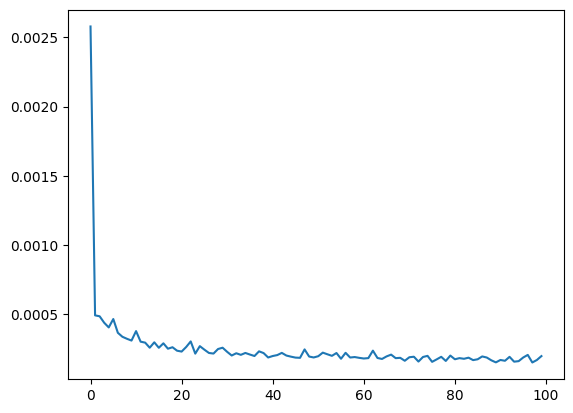

In [44]:
import matplotlib.pyplot as plt

plt.plot(myModel.history.history['loss'])

In [71]:
train_prediction = mm_obj.inverse_transform(myModel.predict(X_train))
test_prediction = mm_obj.inverse_transform(myModel.predict(X_test))
print(math.sqrt(mean_squared_error(mm_obj.inverse_transform(y_train.reshape(-1,1)),train_prediction)))
print(math.sqrt(mean_squared_error(mm_obj.inverse_transform(y_test.reshape(-1,1)),test_prediction)))

132.64064866884857
229.7990537230695


In [23]:
# mm_obj.inverse_transform(y_train.reshape(-1,1))
# train_prediction

In [ ]:
d = pd.read_csv("data.csv")
# d.values

In [ ]:
a = d.values
feat = mm_obj.transform(a[:,0].reshape(-1,1))
l = []
for i in range(len(feat)):
    l.append([feat[i][0], a[i,1]])
a = np.array(l)

In [ ]:
mm_obj.inverse_transform(myModel.predict(a.reshape(1,a.shape[0], a.shape[1])))

1/1 [==============================] - 0s 28ms/step


array([[29438.607]], dtype=float32)

In [47]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [48]:
myModel.save("model.h5")